                                club_names
0                     Fulham Football Club
1                    Everton Football Club
2          Manchester United Football Club
3                    Arsenal Football Club
4                    Chelsea Football Club
5    Wolverhampton Wanderers Football Club
9                           Leicester City
11               Aston Villa Football Club
12                            Leeds United
13           Manchester City Football Club
15                 Brentford Football Club
16                          Southampton FC
17         Nottingham Forest Football Club
20           West Ham United Football Club
21          Newcastle United Football Club
26                 Liverpool Football Club
27   Association Football Club Bournemouth
31  Brighton and Hove Albion Football Club
32         Tottenham Hotspur Football Club
47            Crystal Palace Football Club 

Nombre del equipo: Manchester United Football Club y su id: 985 

revisar si existe sobremuestr

c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

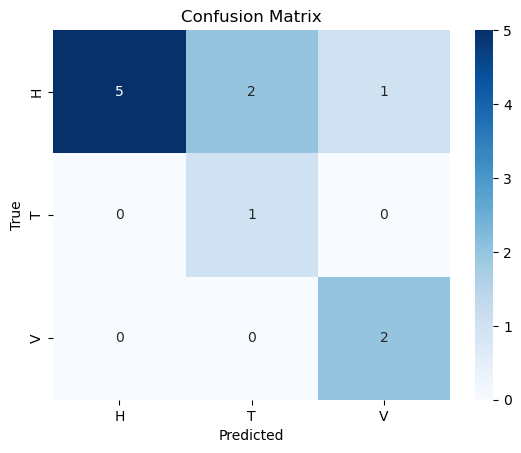


Métricas de regresión para evaluación de la clasificación:
Mean Squared Error (MSE): 0.55
Mean Absolute Error (MAE): 0.36
R^2 Score: 0.11
                                  Feature  Importance
5         away_club_position_label_Europe    0.177778
12          away_club_formation_label_4_D    0.096296
14                 attendance_label_Large    0.081481
15                attendance_label_Medium    0.074074
11          away_club_formation_label_3_D    0.025926
18                           hosting_Home    0.014815
17                           hosting_Away    0.014815
8           home_club_formation_label_3_D    0.011111
0   home_club_position_label_Championship    0.007407
7     away_club_position_label_Relegation    0.007407


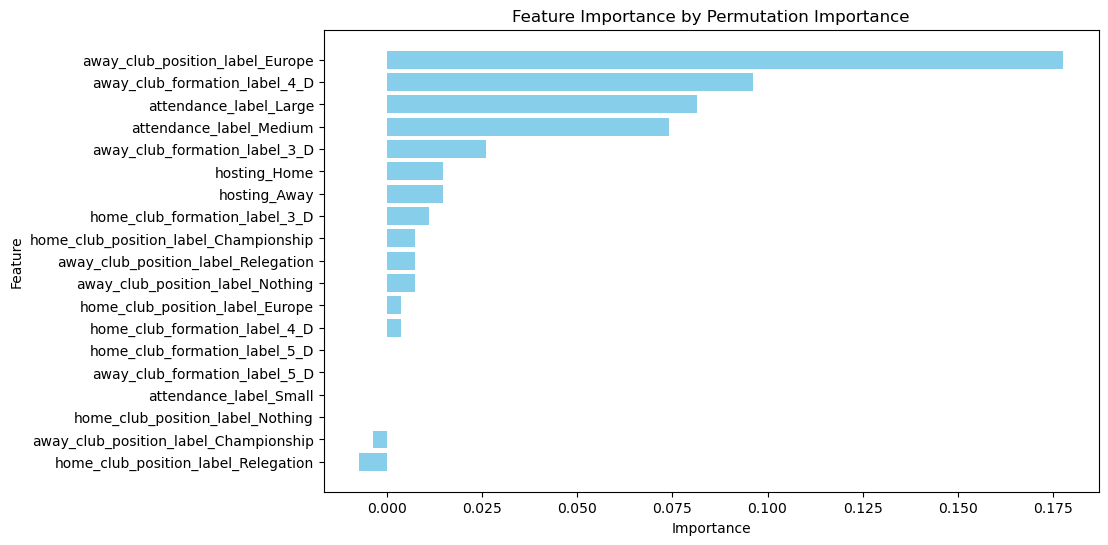

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def assign_attendance_label(attendance):
    if attendance > 45000:   
        return 'Large'
    elif 20000 <= attendance < 45000: 
        return 'Medium'
    elif attendance < 20000: 
        return 'Small'
    else:
        return None

def assign_formation_label(formation):
    if formation.startswith('4'):   
        return '4_D'
    elif formation.startswith('3'): 
        return '3_D'
    elif formation.startswith('5'): 
        return '5_D'
    else:
        return None

def assign_position_label(position):
    if position <= 2:
        return 'Championship'
    elif 3 <= position <= 9:
        return 'Europe'
    elif 10 <= position <= 14:
        return 'Nothing'
    elif 15 <= position <= 20:
        return 'Relegation'
    else:
        return None  

def get_club_id(club_name):
    return club_data.loc[club_data['name'].str.contains(club_name), 'club_id'].values[0]

    
def printer_home(label, proba, team_name):
            if label == 'H':
                print(f"Victoria de {team_name}: {proba:.2f}%")
            elif label == 'T':
                print(f"Empate : {proba:.2f}%")
            else:
                print(f"Derrota de {team_name}: {proba:.2f}%")

def printer_visitor(label, proba, team_name):
            if label == 'V':
                print(f"Victoria de {team_name}: {proba:.2f}%")
            elif label == 'T':
                print(f"Empate : {proba:.2f}%")
            else:
                print(f"Derrota de {team_name}: {proba:.2f}%")


club_data = pd.read_csv('csv/clubs.csv')
club_games_data = pd.read_csv('csv/club_games.csv')
games_data = pd.read_csv('csv/games.csv')
games_data['home_club_formation'] = games_data['home_club_formation'].str.replace(r'^\D+', '', regex=True)
games_data['away_club_formation'] = games_data['away_club_formation'].str.replace(r'^\D+', '', regex=True)


season = int(input("Ingresa la temporada a buscar (2023 para la 23/24, 2022 para 22/23): "))
matchDay = 28 

filtered_games = games_data[(games_data['season'] == season) & 
                            (games_data['competition_id'] == 'GB1') & 
                            (games_data['competition_type'] == 'domestic_league')].copy()

filtered_games['round'] = filtered_games['round'].str.replace(r'\D+', '', regex=True).astype(int)
selected_games = filtered_games[filtered_games['round'] == matchDay]

filtered_teams = pd.DataFrame({
    'club_names': pd.concat([filtered_games['home_club_name'], filtered_games['away_club_name']], ignore_index=True)
}).drop_duplicates(subset='club_names', keep='first')

print(filtered_teams, '\n')

selected_index = int(input("Ingresa el índice del equipo que deseas seleccionar: "))
selected_team = filtered_teams.loc[selected_index]

if not selected_team.empty:
    team_name = selected_team['club_names']
    team_id = filtered_games.loc[filtered_games['home_club_name'] == team_name, 'home_club_id'].drop_duplicates(keep='first').iloc[0]
    print(f"Nombre del equipo: {team_name} y su id: {team_id} \n")
else:
    print("No se encontró un equipo con el índice proporcionado.\n")

filtered_games['result'] = filtered_games.apply(lambda row: 'H' if row['home_club_goals'] > row['away_club_goals'] else 
                                                ('T' if row['home_club_goals'] == row['away_club_goals'] else 'V'), axis=1)

filtered_games['home_club_position_label'] = filtered_games['home_club_position'].apply(assign_position_label)
filtered_games['away_club_position_label'] = filtered_games['away_club_position'].apply(assign_position_label)

filtered_games['home_club_formation_label'] = filtered_games['home_club_formation'].apply(assign_formation_label)
filtered_games['away_club_formation_label'] = filtered_games['away_club_formation'].apply(assign_formation_label)


filtered_games['attendance_label'] = filtered_games['attendance'].apply(assign_attendance_label)


team_home_games = filtered_games[filtered_games['home_club_name'] == team_name].merge(
    club_games_data[(club_games_data['hosting'] == 'Home') & (club_games_data['club_id'] == team_id)],
    on='game_id', how='inner')

team_away_games = filtered_games[filtered_games['away_club_name'] == team_name].merge(
    club_games_data[(club_games_data['hosting'] == 'Away') & (club_games_data['club_id'] == team_id)],
    on='game_id', how='inner')

columns_to_keep = ['game_id', 'home_club_name', 'away_club_name', 'home_club_id', 'away_club_id', 'round', 'attendance_label',
                   'home_club_position_label', 'away_club_position_label', 'home_club_formation_label', 'away_club_formation_label',
                   'home_club_goals', 'away_club_goals', 'hosting', 'is_win', 'result']

team_home_games = team_home_games[columns_to_keep]
team_away_games = team_away_games[columns_to_keep]
filtered_games = pd.concat([team_home_games, team_away_games])

filtered_games = filtered_games.sort_values(by='round').reset_index(drop=True)

features = ['home_club_position_label', 'away_club_position_label', 'home_club_formation_label', 'away_club_formation_label','attendance_label','hosting']

train_data = filtered_games[filtered_games['round'] < matchDay]
X_train = train_data[features]
y_train = train_data['result']

print('revisar si existe sobremuestreo o submuestreo')
print(y_train.value_counts())

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs'],
    'multi_class': ['multinomial']
}

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)

model = GridSearchCV(LogisticRegression(max_iter=3000, multi_class='multinomial', solver='lbfgs',class_weight='balanced'),
                     param_grid, cv=5, scoring='accuracy')
model.fit(X_train_encoded, y_train)
best_model = model.best_estimator_
print("Mejores hiperparámetros encontrados:", model.best_params_)

test_data = filtered_games[((filtered_games['home_club_id'] == team_id) | (filtered_games['away_club_id'] == team_id)) &
                           (filtered_games['round'] >= matchDay)][features]
test_data_result = filtered_games[((filtered_games['home_club_id'] == team_id) | (filtered_games['away_club_id'] == team_id)) & 
                           (filtered_games['round'] >= matchDay)]['result']
X_test_encoded = encoder.transform(test_data)

if not test_data.empty:
    y_pred = best_model.predict(X_test_encoded)
    y_proba = best_model.predict_proba(X_test_encoded)

    print(f"\nPredicción para los partidos de {team_name} a partir de la jornada: {matchDay}:") 
    print(f"Número de partidos a predecir: {len(test_data)}")
    print(f"Número de predicciones: {len(y_pred)}")

    for idx in range(len(test_data)):
        row = test_data.iloc[idx]
 
        print('\n')
        print("Resultado predicho:", y_pred[idx], "para la jornada ",matchDay+ idx )

        class_labels = best_model.classes_
        proba_percentages = y_proba[idx] * 100

       
        for label, proba in zip(class_labels, proba_percentages):
            if row['hosting'] == 'Home':
                printer_home(label, proba, team_name)
            elif row['hosting'] == 'Away':
                printer_visitor(label, proba, team_name)
            else: 
                print('Fallo en la detección del local')

    
    print("\nValores predichos en el conjunto de prueba (y_pred):")
    print(pd.DataFrame(y_pred, columns=['y_pred']))

    print("\nValores verdaderos en el conjunto de prueba (y_test):")
    print(pd.DataFrame(test_data_result.values, columns=['y_test']))

    
    print("\nReporte de Clasificación en el conjunto de prueba:")
    print(classification_report(test_data_result, y_pred))

    print("\nPrecisión en el conjunto de prueba:")
    print(f"Accuracy en prueba: {accuracy_score(test_data_result, y_pred):.2f}")

    
    cm = confusion_matrix(test_data_result, y_pred, labels=best_model.classes_)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    
    
    class_mapping = {label: idx for idx, label in enumerate(best_model.classes_)}
    y_test_numeric = test_data_result.map(class_mapping)
    y_pred_numeric = pd.Series(y_pred).map(class_mapping)

    mse = mean_squared_error(y_test_numeric, y_pred_numeric)
    mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
    r2 = r2_score(y_test_numeric, y_pred_numeric)

    print("\nMétricas de regresión para evaluación de la clasificación:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")

else:
    print(f"No hay partidos disponibles para {team_name} a partir de la jornada: {matchDay}")

feature_names = encoder.get_feature_names_out(X_train.columns)  

result = permutation_importance(best_model, X_train_encoded, y_train, n_repeats=10, random_state=42)

feature_importance_perm = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
})

feature_importance_perm_sorted = feature_importance_perm.sort_values(by='Importance', ascending=False)

print(feature_importance_perm_sorted.head(10))
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_perm_sorted['Feature'], feature_importance_perm_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance by Permutation Importance')
plt.gca().invert_yaxis() 
plt.show()


                                club_names
0                     Fulham Football Club
1                    Everton Football Club
2          Manchester United Football Club
3                    Arsenal Football Club
4                    Chelsea Football Club
5    Wolverhampton Wanderers Football Club
9                           Leicester City
11               Aston Villa Football Club
12                            Leeds United
13           Manchester City Football Club
15                 Brentford Football Club
16                          Southampton FC
17         Nottingham Forest Football Club
20           West Ham United Football Club
21          Newcastle United Football Club
26                 Liverpool Football Club
27   Association Football Club Bournemouth
31  Brighton and Hove Albion Football Club
32         Tottenham Hotspur Football Club
47            Crystal Palace Football Club 

Nombre del equipo: Manchester United Football Club y su id: 985 

revisar si existe sobremuestr

c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

Mejores hiperparámetros encontrados: {'C': 0.01, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

Predicción para los partidos de Manchester United Football Club en la temporada: 2022:
Número de partidos a predecir: 38
Número de predicciones: 38


Resultado predicho: T para la jornada:  1
Victoria de Manchester United Football Club: 27.43%
Empate : 40.78%
Derrota de Manchester United Football Club: 31.79%


Resultado predicho: H para la jornada:  2
Derrota de Manchester United Football Club: 55.36%
Empate : 26.81%
Victoria de Manchester United Football Club: 17.82%


Resultado predicho: H para la jornada:  3
Victoria de Manchester United Football Club: 48.35%
Empate : 34.68%
Derrota de Manchester United Football Club: 16.96%


Resultado predicho: V para la jornada:  4
Derrota de Manchester United Football Club: 22.55%
Empate : 37.99%
Victoria de Manchester United Football Club: 39.45%


Resultado predicho: V para la jornada:  5
Derrota de Manchester United Football Club: 16.07%
Empate

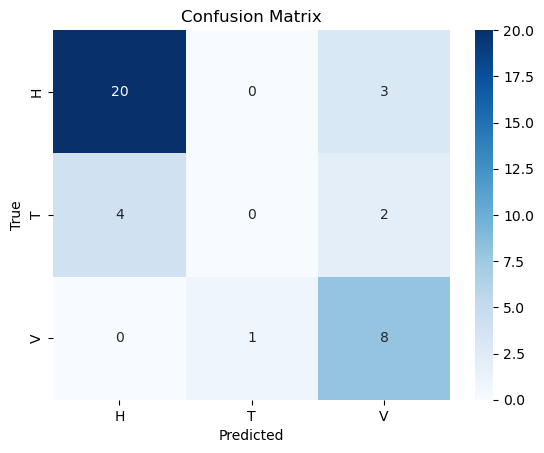


Métricas de regresión para evaluación de la clasificación:
Mean Squared Error (MSE): 0.50
Mean Absolute Error (MAE): 0.34
R^2 Score: 0.29
                                  Feature  Importance
3     home_club_position_label_Relegation    0.038026
7     away_club_position_label_Relegation    0.036404
4   away_club_position_label_Championship    0.022982
5         away_club_position_label_Europe    0.015175
0   home_club_position_label_Championship    0.015175
6        away_club_position_label_Nothing    0.005570
17                  attendance_label_None    0.004254
12          away_club_formation_label_4_D    0.003158
14                 attendance_label_Large    0.001447
10          home_club_formation_label_5_D    0.001447


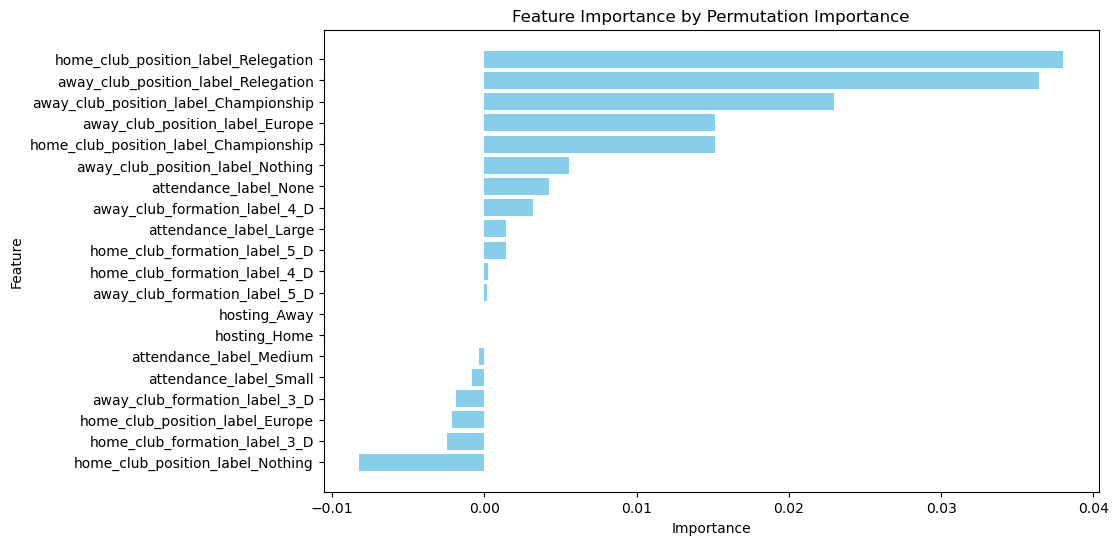

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def assign_attendance_label(attendance):
    if attendance > 45000:   
        return 'Large'
    elif 20000 <= attendance < 45000: 
        return 'Medium'
    elif attendance < 20000: 
        return 'Small'
    else:
        return None

def assign_formation_label(formation):
    if formation.startswith('4'):   
        return '4_D'
    elif formation.startswith('3'): 
        return '3_D'
    elif formation.startswith('5'): 
        return '5_D'
    else:
        return None

def assign_position_label(position):
    if position <= 2:
        return 'Championship'
    elif 3 <= position <= 9:
        return 'Europe'
    elif 10 <= position <= 14:
        return 'Nothing'
    elif 15 <= position <= 20:
        return 'Relegation'
    else:
        return None  

def get_club_id(club_name):
    return club_data.loc[club_data['name'].str.contains(club_name), 'club_id'].values[0]

    
def printer_home(label, proba, team_name):
            if label == 'H':
                print(f"Victoria de {team_name}: {proba:.2f}%")
            elif label == 'T':
                print(f"Empate : {proba:.2f}%")
            else:
                print(f"Derrota de {team_name}: {proba:.2f}%")

def printer_visitor(label, proba, team_name):
            if label == 'V':
                print(f"Victoria de {team_name}: {proba:.2f}%")
            elif label == 'T':
                print(f"Empate : {proba:.2f}%")
            else:
                print(f"Derrota de {team_name}: {proba:.2f}%")


club_data = pd.read_csv('csv/clubs.csv')
club_games_data = pd.read_csv('csv/club_games.csv')
games_data = pd.read_csv('csv/games.csv')
games_data['home_club_formation'] = games_data['home_club_formation'].str.replace(r'^\D+', '', regex=True)

games_data['away_club_formation'] = games_data['away_club_formation'].str.replace(r'^\D+', '', regex=True)


season = int(input("Ingresa la temporada a buscar (2023 para la 23/24, 2022 para 22/23): "))

filtered_games = games_data[(games_data['season'] >= 2019) & 
                            (games_data['competition_id'] == 'GB1') & 
                            (games_data['competition_type'] == 'domestic_league')].copy()

filtered_games['round'] = filtered_games['round'].str.replace(r'\D+', '', regex=True).astype(int)
selected_games = filtered_games[filtered_games['season'] == season]

filtered_teams = pd.DataFrame({
    'club_names': pd.concat([selected_games['home_club_name'], selected_games['away_club_name']], ignore_index=True)
}).drop_duplicates(subset='club_names', keep='first')

print(filtered_teams, '\n')

selected_index = int(input("Ingresa el índice del equipo que deseas seleccionar: "))
selected_team = filtered_teams.loc[selected_index]

if not selected_team.empty:
    team_name = selected_team['club_names']
    team_id = selected_games.loc[selected_games['home_club_name'] == team_name, 'home_club_id'].drop_duplicates(keep='first').iloc[0]
    print(f"Nombre del equipo: {team_name} y su id: {team_id} \n")
else:
    print("No se encontró un equipo con el índice proporcionado.\n")

filtered_games['result'] = filtered_games.apply(lambda row: 'H' if row['home_club_goals'] > row['away_club_goals'] else 
                                                ('T' if row['home_club_goals'] == row['away_club_goals'] else 'V'), axis=1)

filtered_games['home_club_position_label'] = filtered_games['home_club_position'].apply(assign_position_label)
filtered_games['away_club_position_label'] = filtered_games['away_club_position'].apply(assign_position_label)

filtered_games['home_club_formation_label'] = filtered_games['home_club_formation'].apply(assign_formation_label)
filtered_games['away_club_formation_label'] = filtered_games['away_club_formation'].apply(assign_formation_label)


filtered_games['attendance_label'] = filtered_games['attendance'].apply(assign_attendance_label)


selected_games = filtered_games[filtered_games['season'] < season]

merged_club_games = club_games_data.merge(club_data, on='club_id')
selected_games = merged_club_games.merge(selected_games, on='game_id')

team_home_games = filtered_games[filtered_games['home_club_name'] == team_name].merge(
    club_games_data[(club_games_data['hosting'] == 'Home') & (club_games_data['club_id'] == team_id)],
    on='game_id', how='inner')

team_away_games = filtered_games[filtered_games['away_club_name'] == team_name].merge(
    club_games_data[(club_games_data['hosting'] == 'Away') & (club_games_data['club_id'] == team_id)],
    on='game_id', how='inner')

columns_to_keep = ['game_id', 'home_club_name', 'away_club_name', 'home_club_id', 'away_club_id', 'round', 'attendance_label',
                   'home_club_position_label', 'away_club_position_label', 'home_club_formation_label', 'away_club_formation_label',
                   'home_club_goals', 'away_club_goals', 'hosting', 'is_win', 'result', 'season']

team_home_games = team_home_games[columns_to_keep]
team_away_games = team_away_games[columns_to_keep]
filtered_games = pd.concat([team_home_games, team_away_games])

filtered_games = filtered_games.sort_values(by='round').reset_index(drop=True)

filtered_games = filtered_games[filtered_games['season'] == season]
features = ['home_club_position_label', 'away_club_position_label', 'home_club_formation_label', 'away_club_formation_label','attendance_label','hosting']


train_data = selected_games
X_train = train_data[features]
y_train = train_data['result']

print('revisar si existe sobremuestreo o submuestreo')
print(y_train.value_counts())

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs'],
    'multi_class': ['multinomial']
}

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)

model = GridSearchCV(LogisticRegression(max_iter=3000, multi_class='multinomial', solver='lbfgs',class_weight='balanced'),
                     param_grid, cv=5, scoring='accuracy')
model.fit(X_train_encoded, y_train)
best_model = model.best_estimator_
print("Mejores hiperparámetros encontrados:", model.best_params_)

test_data = filtered_games[((filtered_games['home_club_id'] == team_id) | (filtered_games['away_club_id'] == team_id))][features]
test_data_result = filtered_games[((filtered_games['home_club_id'] == team_id) | (filtered_games['away_club_id'] == team_id))]['result']
X_test_encoded = encoder.transform(test_data)

if not test_data.empty:
    y_pred = best_model.predict(X_test_encoded)
    y_proba = best_model.predict_proba(X_test_encoded)

    print(f"\nPredicción para los partidos de {team_name} en la temporada: {season}:") 
    print(f"Número de partidos a predecir: {len(test_data)}")
    print(f"Número de predicciones: {len(y_pred)}")

    for idx in range(len(test_data)):
        row = test_data.iloc[idx]
 
        print('\n')
        print("Resultado predicho:", y_pred[idx], "para la jornada: ",  idx + 1 )

        class_labels = best_model.classes_
        proba_percentages = y_proba[idx] * 100

       
        for label, proba in zip(class_labels, proba_percentages):
            if row['hosting'] == 'Home':
                printer_home(label, proba, team_name)
            elif row['hosting'] == 'Away':
                printer_visitor(label, proba, team_name)
            else: 
                print('Fallo en la detección del local')

  
    print("\nValores predichos en el conjunto de prueba (y_pred):")
    print(pd.DataFrame(y_pred, columns=['y_pred']))

    print("\nValores verdaderos en el conjunto de prueba (y_test):")
    print(pd.DataFrame(test_data_result.values, columns=['y_test']))


    print("\nReporte de Clasificación en el conjunto de prueba:")
    print(classification_report(test_data_result, y_pred))

    print("\nPrecisión en el conjunto de prueba:")
    print(f"Accuracy en prueba: {accuracy_score(test_data_result, y_pred):.2f}")

    cm = confusion_matrix(test_data_result, y_pred, labels=best_model.classes_)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

  
    class_mapping = {label: idx for idx, label in enumerate(best_model.classes_)}
    y_test_numeric = test_data_result.map(class_mapping)
    y_pred_numeric = pd.Series(y_pred).map(class_mapping)

    mse = mean_squared_error(y_test_numeric, y_pred_numeric)
    mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
    r2 = r2_score(y_test_numeric, y_pred_numeric)

    print("\nMétricas de regresión para evaluación de la clasificación:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")

else:
    print(f"No hay partidos disponibles para {team_name} a partir de la jornada: {matchDay}")

feature_names = encoder.get_feature_names_out(X_train.columns)  

result = permutation_importance(best_model, X_train_encoded, y_train, n_repeats=10, random_state=42)

feature_importance_perm = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
})

feature_importance_perm_sorted = feature_importance_perm.sort_values(by='Importance', ascending=False)

print(feature_importance_perm_sorted.head(10))
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_perm_sorted['Feature'], feature_importance_perm_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance by Permutation Importance')
plt.gca().invert_yaxis()  
plt.show()


                                club_names
0                     Fulham Football Club
1                    Everton Football Club
2          Manchester United Football Club
3                    Arsenal Football Club
4                    Chelsea Football Club
5    Wolverhampton Wanderers Football Club
9                           Leicester City
11               Aston Villa Football Club
12                            Leeds United
13           Manchester City Football Club
15                 Brentford Football Club
16                          Southampton FC
17         Nottingham Forest Football Club
20           West Ham United Football Club
21          Newcastle United Football Club
26                 Liverpool Football Club
27   Association Football Club Bournemouth
31  Brighton and Hove Albion Football Club
32         Tottenham Hotspur Football Club
47            Crystal Palace Football Club 

Nombre del equipo: Manchester United Football Club y su id: 985 

revisar si existe sobremuestr

c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ivizq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to 

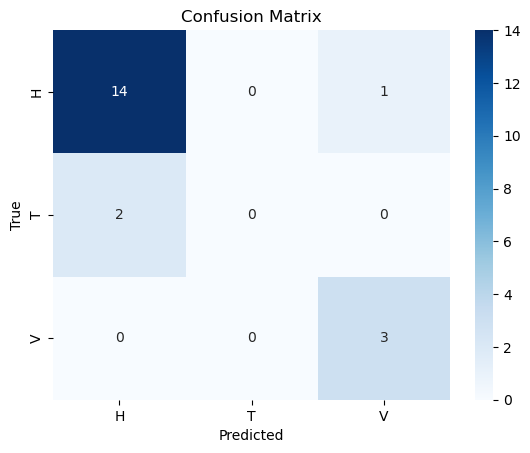


Métricas de regresión para evaluación de la clasificación:
Mean Squared Error (MSE): 0.30
Mean Absolute Error (MAE): 0.20
R^2 Score: 0.44
                                  Feature  Importance
13                attendance_label_Medium    0.038889
12                 attendance_label_Large    0.033333
16                           hosting_Home    0.027778
15                           hosting_Away    0.027778
5         away_club_position_label_Europe    0.005556
6     away_club_position_label_Relegation    0.005556
10          away_club_formation_label_3_D    0.000000
14                 attendance_label_Small    0.000000
11          away_club_formation_label_4_D    0.000000
0   home_club_position_label_Championship    0.000000


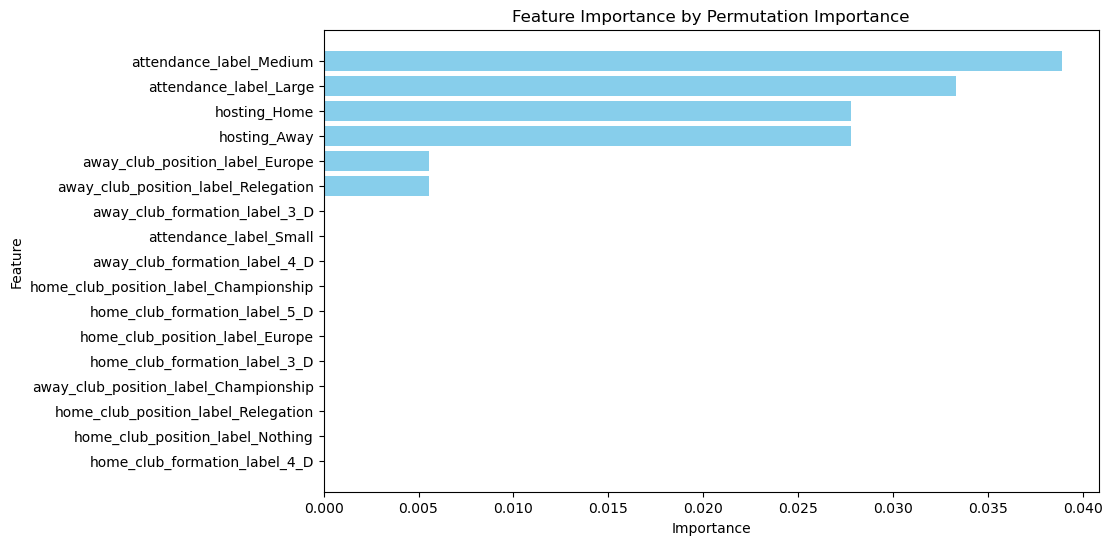

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def assign_attendance_label(attendance):
    if attendance > 45000:   
        return 'Large'
    elif 20000 <= attendance < 45000: 
        return 'Medium'
    elif attendance < 20000: 
        return 'Small'
    else:
        return None

def assign_formation_label(formation):
    if formation.startswith('4'):   
        return '4_D'
    elif formation.startswith('3'): 
        return '3_D'
    elif formation.startswith('5'): 
        return '5_D'
    else:
        return None

def assign_position_label(position):
    if position <= 2:
        return 'Championship'
    elif 3 <= position <= 9:
        return 'Europe'
    elif 10 <= position <= 14:
        return 'Nothing'
    elif 15 <= position <= 20:
        return 'Relegation'
    else:
        return None  

def get_club_id(club_name):
    return club_data.loc[club_data['name'].str.contains(club_name), 'club_id'].values[0]

    
def printer_home(label, proba, team_name):
            if label == 'H':
                print(f"Victoria de {team_name}: {proba:.2f}%")
            elif label == 'T':
                print(f"Empate : {proba:.2f}%")
            else:
                print(f"Derrota de {team_name}: {proba:.2f}%")

def printer_visitor(label, proba, team_name):
            if label == 'V':
                print(f"Victoria de {team_name}: {proba:.2f}%")
            elif label == 'T':
                print(f"Empate : {proba:.2f}%")
            else:
                print(f"Derrota de {team_name}: {proba:.2f}%")


club_data = pd.read_csv('csv/clubs.csv')
club_games_data = pd.read_csv('csv/club_games.csv')
games_data = pd.read_csv('csv/games.csv')
games_data['home_club_formation'] = games_data['home_club_formation'].str.replace(r'^\D+', '', regex=True)
games_data['away_club_formation'] = games_data['away_club_formation'].str.replace(r'^\D+', '', regex=True)


season = int(input("Ingresa la temporada a buscar (2023 para la 23/24, 2022 para 22/23): "))
matchDay = 19 

filtered_games = games_data[(games_data['season'] == season) & 
                            (games_data['competition_id'] == 'GB1') & 
                            (games_data['competition_type'] == 'domestic_league')].copy()

filtered_games['round'] = filtered_games['round'].str.replace(r'\D+', '', regex=True).astype(int)
selected_games = filtered_games[filtered_games['round'] == matchDay]

filtered_teams = pd.DataFrame({
    'club_names': pd.concat([filtered_games['home_club_name'], filtered_games['away_club_name']], ignore_index=True)
}).drop_duplicates(subset='club_names', keep='first')

print(filtered_teams, '\n')

selected_index = int(input("Ingresa el índice del equipo que deseas seleccionar: "))
selected_team = filtered_teams.loc[selected_index]

if not selected_team.empty:
    team_name = selected_team['club_names']
    team_id = filtered_games.loc[filtered_games['home_club_name'] == team_name, 'home_club_id'].drop_duplicates(keep='first').iloc[0]
    print(f"Nombre del equipo: {team_name} y su id: {team_id} \n")
else:
    print("No se encontró un equipo con el índice proporcionado.\n")

filtered_games['result'] = filtered_games.apply(lambda row: 'H' if row['home_club_goals'] > row['away_club_goals'] else 
                                                ('T' if row['home_club_goals'] == row['away_club_goals'] else 'V'), axis=1)

filtered_games['home_club_position_label'] = filtered_games['home_club_position'].apply(assign_position_label)
filtered_games['away_club_position_label'] = filtered_games['away_club_position'].apply(assign_position_label)

filtered_games['home_club_formation_label'] = filtered_games['home_club_formation'].apply(assign_formation_label)
filtered_games['away_club_formation_label'] = filtered_games['away_club_formation'].apply(assign_formation_label)


filtered_games['attendance_label'] = filtered_games['attendance'].apply(assign_attendance_label)



team_home_games = filtered_games[filtered_games['home_club_name'] == team_name].merge(
    club_games_data[(club_games_data['hosting'] == 'Home') & (club_games_data['club_id'] == team_id)],
    on='game_id', how='inner')

team_away_games = filtered_games[filtered_games['away_club_name'] == team_name].merge(
    club_games_data[(club_games_data['hosting'] == 'Away') & (club_games_data['club_id'] == team_id)],
    on='game_id', how='inner')

columns_to_keep = ['game_id', 'home_club_name', 'away_club_name', 'home_club_id', 'away_club_id', 'round', 'attendance_label',
                   'home_club_position_label', 'away_club_position_label', 'home_club_formation_label', 'away_club_formation_label',
                   'home_club_goals', 'away_club_goals', 'hosting', 'is_win', 'result']

team_home_games = team_home_games[columns_to_keep]
team_away_games = team_away_games[columns_to_keep]
filtered_games = pd.concat([team_home_games, team_away_games])

filtered_games = filtered_games.sort_values(by='round').reset_index(drop=True)

features = ['home_club_position_label', 'away_club_position_label', 'home_club_formation_label', 'away_club_formation_label','attendance_label','hosting']

train_data = filtered_games[filtered_games['round'] < matchDay]
X_train = train_data[features]
y_train = train_data['result']

print('revisar si existe sobremuestreo o submuestreo')
print(y_train.value_counts())

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs'],
    'multi_class': ['multinomial']
}

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)

model = GridSearchCV(LogisticRegression(max_iter=3000, multi_class='multinomial', solver='lbfgs'),
                     param_grid, cv=5, scoring='accuracy')
model.fit(X_train_encoded, y_train)
best_model = model.best_estimator_
print("Mejores hiperparámetros encontrados:", model.best_params_)

test_data = filtered_games[((filtered_games['home_club_id'] == team_id) | (filtered_games['away_club_id'] == team_id)) &
                           (filtered_games['round'] >= matchDay)][features]
test_data_result = filtered_games[((filtered_games['home_club_id'] == team_id) | (filtered_games['away_club_id'] == team_id)) & 
                           (filtered_games['round'] >= matchDay)]['result']
X_test_encoded = encoder.transform(test_data)

if not test_data.empty:
    y_pred = best_model.predict(X_test_encoded)
    y_proba = best_model.predict_proba(X_test_encoded)

    print(f"\nPredicción para los partidos de {team_name} a partir de la jornada: {matchDay}:") 
    print(f"Número de partidos a predecir: {len(test_data)}")
    print(f"Número de predicciones: {len(y_pred)}")

    for idx in range(len(test_data)):
        row = test_data.iloc[idx]
 
        print('\n')
        print("Resultado predicho:", y_pred[idx], "para la jornada ",matchDay+ idx )

        class_labels = best_model.classes_
        proba_percentages = y_proba[idx] * 100

       
        for label, proba in zip(class_labels, proba_percentages):
            if row['hosting'] == 'Home':
                printer_home(label, proba, team_name)
            elif row['hosting'] == 'Away':
                printer_visitor(label, proba, team_name)
            else: 
                print('Fallo en la detección del local')

    print("\nValores predichos en el conjunto de prueba (y_pred):")
    print(pd.DataFrame(y_pred, columns=['y_pred']))

    print("\nValores verdaderos en el conjunto de prueba (y_test):")
    print(pd.DataFrame(test_data_result.values, columns=['y_test']))

    print("\nReporte de Clasificación en el conjunto de prueba:")
    print(classification_report(test_data_result, y_pred))

    print("\nPrecisión en el conjunto de prueba:")
    print(f"Accuracy en prueba: {accuracy_score(test_data_result, y_pred):.2f}")

    cm = confusion_matrix(test_data_result, y_pred, labels=best_model.classes_)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


    class_mapping = {label: idx for idx, label in enumerate(best_model.classes_)}
    y_test_numeric = test_data_result.map(class_mapping)
    y_pred_numeric = pd.Series(y_pred).map(class_mapping)

    mse = mean_squared_error(y_test_numeric, y_pred_numeric)
    mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
    r2 = r2_score(y_test_numeric, y_pred_numeric)

    print("\nMétricas de regresión para evaluación de la clasificación:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")

else:
    print(f"No hay partidos disponibles para {team_name} a partir de la jornada: {matchDay}")

feature_names = encoder.get_feature_names_out(X_train.columns)  

result = permutation_importance(best_model, X_train_encoded, y_train, n_repeats=10, random_state=42)

feature_importance_perm = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
})

feature_importance_perm_sorted = feature_importance_perm.sort_values(by='Importance', ascending=False)

print(feature_importance_perm_sorted.head(10))
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_perm_sorted['Feature'], feature_importance_perm_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance by Permutation Importance')
plt.gca().invert_yaxis() 
plt.show()
